# Decision Trees

In [34]:
#import modules

import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Toy Example 1: Iris Dataset

In [5]:
#import data and model

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [24]:
#visualizing the decision tree

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


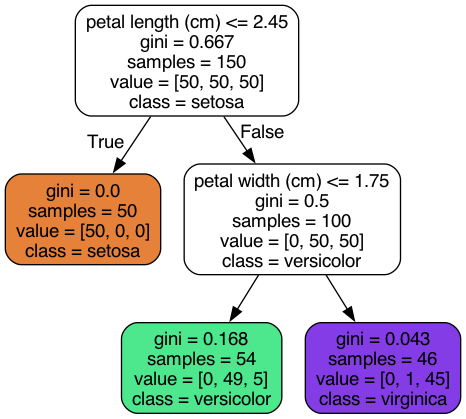

In [25]:
#Display the tree gragh

from graphviz import Source

# Specify the .dot file path
dot_file = "iris_tree.dot"

# Convert to .png and display in the notebook
graph = Source.from_file(dot_file)
graph.format = "png"  # Set output format
graph.render(filename="iris_tree", directory="images", cleanup=True)  # Save the PNG file

# Display the PNG file in the notebook
from IPython.display import Image
Image("images/iris_tree.png")


In [26]:
#Prediction

tree_clf.predict([[5, 1.5]]) 

array([1])

In [27]:
tree_clf.predict_proba([[5, 1.5]]) 

array([[0.        , 0.90740741, 0.09259259]])

In [31]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [30]:
#Feature importance

tree_clf.feature_importances_

array([0.56199095, 0.43800905])

In [33]:
print(
    f"The importance of the two features are: \n"
    f"{iris.feature_names[2:][0]}: {tree_clf.feature_importances_[0]:.2f} \n"
    f"{iris.feature_names[2:][1]}: {tree_clf.feature_importances_[1]:.2f}"
)


The importance of the two features are: 
petal length (cm): 0.56 
petal width (cm): 0.44


## Toy Example 2: Moons Dataset

In [67]:
#Generate a synthetic dataset with two interleaving moon-shaped clusters

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

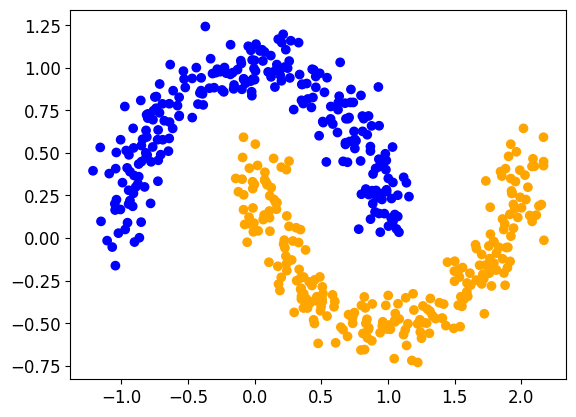

In [69]:
#Plot the dataset
# Map y to colors
colors = np.array(['blue', 'orange'])  # Define colors for y=0 and y=1
point_colors = colors[y]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=point_colors)

In [71]:
#Split the dataset into training and testing subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Perform grid search with cross-validation to optimize hyperparameters

from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [64]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)

In [65]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.93

In [66]:
sklearn.metrics.f1_score(y_test, y_pred)

0.9345794392523364